In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('Airbnb_Open_Data.xlsx') 



 Monthly Review Summary:
  last_review_ym  review_count
0        2012-07             2
1        2012-08             4
2        2012-09            10
3        2012-11             4
4        2012-12             6

 Review Activity by Neighbourhood Group:
  last_review_ym neighbourhood_group  review_count
0        2012-07            Brooklyn             2
1        2012-08            Brooklyn             4
2        2012-09            Brooklyn             2
3        2012-09           Manhattan             6
4        2012-09              Queens             2


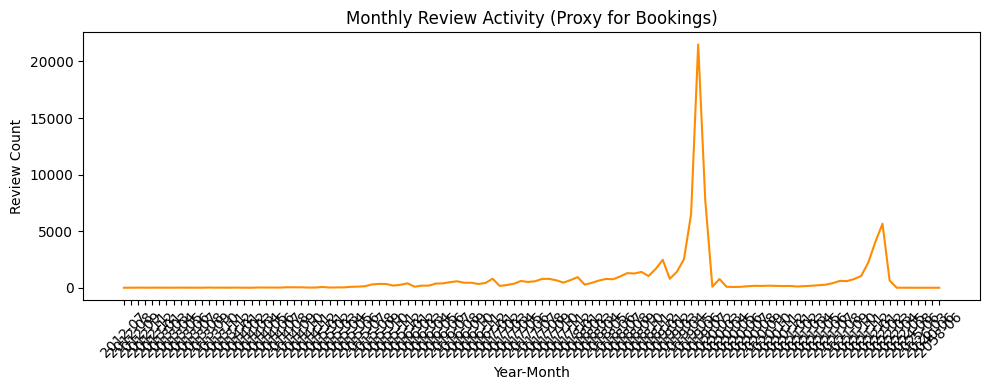

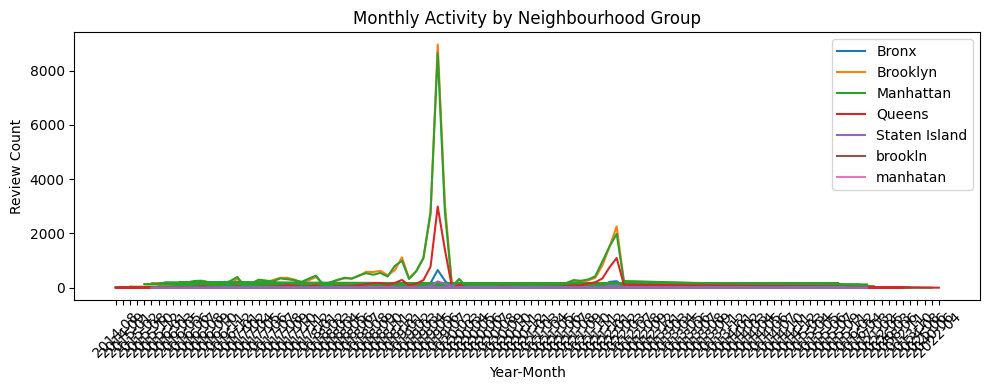

 Data loaded, cleaned, and booking pattern analysis executed.


In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_airbnb = pd.read_excel('Airbnb_Open_Data.xlsx')  

work = df_airbnb.copy()
work.columns = [col.strip().lower().replace(' ', '_') for col in work.columns]

if 'last_review' in work.columns:
    work['last_review'] = pd.to_datetime(work['last_review'], errors='coerce')

numeric_cols = [
    'price', 'service_fee', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'availability_365', 'calculated_host_listings_count',
    'review_rate_number', 'lat', 'long', 'construction_year'
]
for col in numeric_cols:
    if col in work.columns:
        work[col] = pd.to_numeric(work[col], errors='coerce')

work['last_review_ym'] = work['last_review'].dt.to_period('M')

monthly_reviews = (
    work.dropna(subset=['last_review_ym'])
    .groupby('last_review_ym')
    .size()
    .reset_index(name='review_count')
)

if 'neighbourhood_group' in work.columns:
    by_group = (
        work.dropna(subset=['last_review_ym', 'neighbourhood_group'])
        .groupby(['last_review_ym', 'neighbourhood_group'])
        .size()
        .reset_index(name='review_count')
    )
else:
    by_group = pd.DataFrame()

print(" Monthly Review Summary:")
print(monthly_reviews.head())

if not by_group.empty:
    print("\n Review Activity by Neighbourhood Group:")
    print(by_group.head())

plt.figure(figsize=(10, 4))
monthly_reviews_sorted = monthly_reviews.sort_values('last_review_ym')
plt.plot(monthly_reviews_sorted['last_review_ym'].astype(str), monthly_reviews_sorted['review_count'], color='darkorange')
plt.xticks(rotation=45)
plt.title('Monthly Review Activity (Proxy for Bookings)')
plt.xlabel('Year-Month')
plt.ylabel('Review Count')
plt.tight_layout()
plt.show()

if not by_group.empty:
    plt.figure(figsize=(10, 4))
    for g, sub in by_group.groupby('neighbourhood_group'):
        sub = sub.sort_values('last_review_ym')
        plt.plot(sub['last_review_ym'].astype(str), sub['review_count'], label=str(g))
    plt.xticks(rotation=45)
    plt.title('Monthly Activity by Neighbourhood Group')
    plt.xlabel('Year-Month')
    plt.ylabel('Review Count')
    plt.legend()
    plt.tight_layout()
    plt.show()

print(" Data loaded, cleaned, and booking pattern analysis executed.")

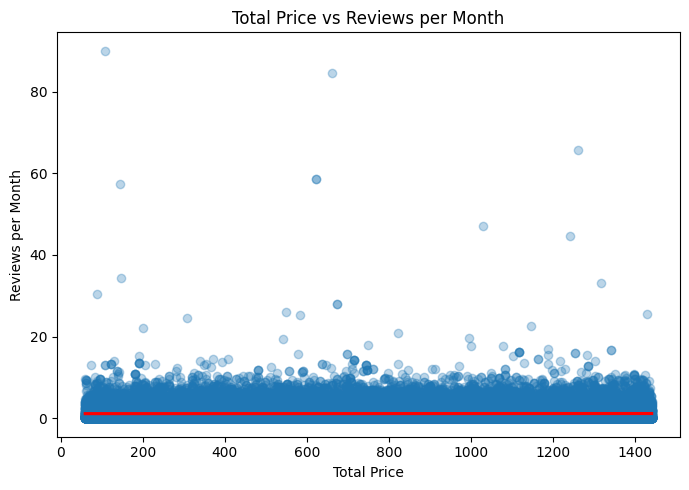

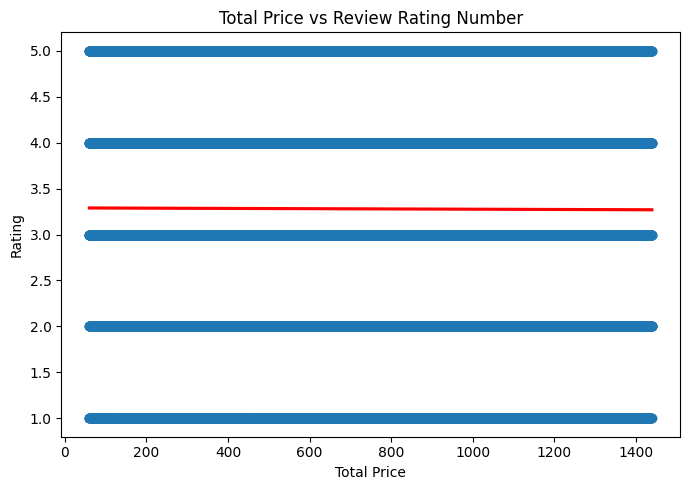

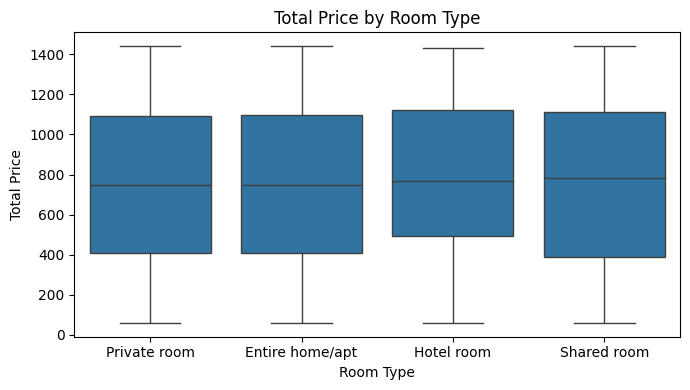

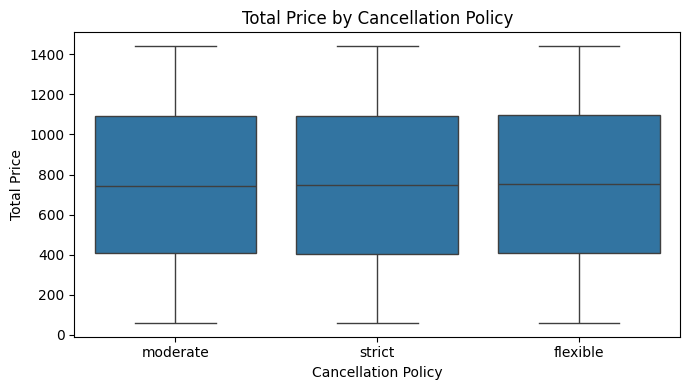

 Correlation Results:
 - total_price vs reviews_per_month: 0.01
 - total_price vs review_rate_number: -0.00
 Pricing strategy visuals and correlations generated.


In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

try:
    df
except NameError:
    xls = pd.ExcelFile('Airbnb_Open_Data.xlsx')  
    df = pd.read_excel(xls, sheet_name=0)
    df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

    
    for col in ['price', 'service_fee', 'reviews_per_month', 'review_rate_number']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    if 'service_fee' in df.columns and 'price' in df.columns:
        df['total_price'] = df['price'] + df['service_fee']
    else:
        df['total_price'] = df['price']


plt.figure(figsize=(7, 5))
sns.regplot(
    data=df.dropna(subset=['total_price', 'reviews_per_month']),
    x='total_price', y='reviews_per_month',
    scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}
)
plt.title('Total Price vs Reviews per Month')
plt.xlabel('Total Price')
plt.ylabel('Reviews per Month')
plt.tight_layout()
plt.show()

if 'review_rate_number' in df.columns:
    plt.figure(figsize=(7, 5))
    sns.regplot(
        data=df.dropna(subset=['total_price', 'review_rate_number']),
        x='total_price', y='review_rate_number',
        scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}
    )
    plt.title('Total Price vs Review Rating Number')
    plt.xlabel('Total Price')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.show()


if 'room_type' in df.columns:
    plt.figure(figsize=(7, 4))
    order = df.groupby('room_type')['total_price'].median().sort_values().index
    sns.boxplot(data=df, x='room_type', y='total_price', order=order)
    plt.title('Total Price by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Total Price')
    plt.tight_layout()
    plt.show()


if 'cancellation_policy' in df.columns:
    plt.figure(figsize=(7, 4))
    order2 = df.groupby('cancellation_policy')['total_price'].median().sort_values().index
    sns.boxplot(data=df, x='cancellation_policy', y='total_price', order=order2)
    plt.title('Total Price by Cancellation Policy')
    plt.xlabel('Cancellation Policy')
    plt.ylabel('Total Price')
    plt.tight_layout()
    plt.show()


corrs = {}
for c in ['reviews_per_month', 'review_rate_number']:
    if c in df.columns:
        tmp = df[['total_price', c]].dropna()
        if len(tmp) > 1:
            corrs[c] = tmp['total_price'].corr(tmp[c])

print(" Correlation Results:")
for k, v in corrs.items():
    print(f" - total_price vs {k}: {v:.2f}")

print(" Pricing strategy visuals and correlations generated.")

 Median Reviews/Month by Room Type:
         room_type  reviews_per_month
0       Hotel room              0.595
1     Private room              0.490
2      Shared room              0.480
3  Entire home/apt              0.470


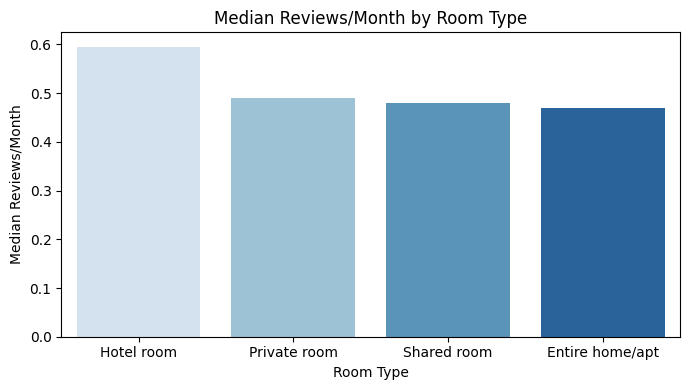

 Median Reviews/Month by Neighbourhood Group:
  neighbourhood_group  reviews_per_month
0            manhatan               2.12
1             brookln               1.34
2               Bronx               1.00
3       Staten Island               1.00
4              Queens               0.90


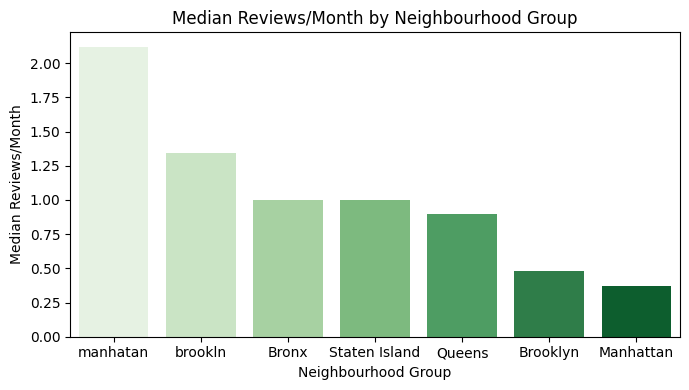

 Median Reviews/Month by Instant Bookable:
   instant_bookable  reviews_per_month
0               0.0               0.48
1               1.0               0.48


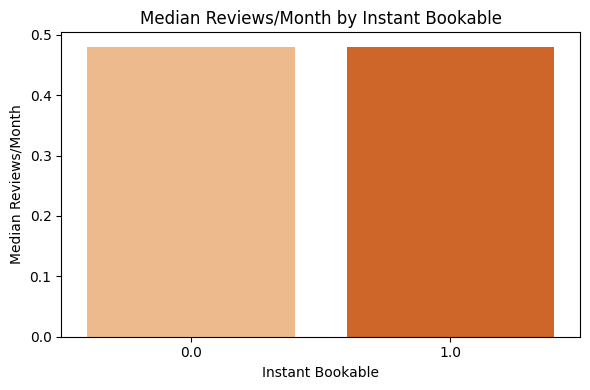

Median Reviews/Month by Host Identity Verified:
  host_identity_verified  reviews_per_month
0            unconfirmed               0.48
1               verified               0.48


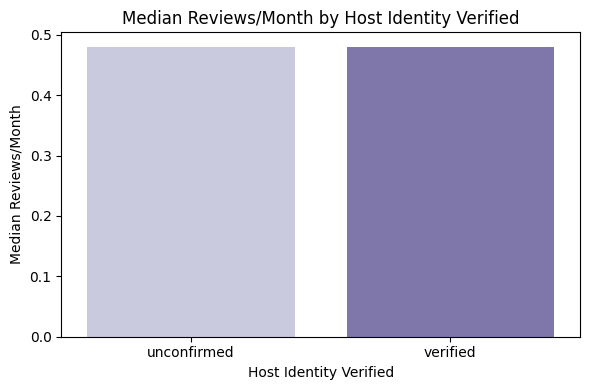

Mean Reviews/Month by Minimum Nights Bin:
  min_n_bin  reviews_per_month
0       1–5           1.204482
1      6–10           0.458750
2     11–30           0.412161
3     31–90           0.406038
4    91–180           0.274764


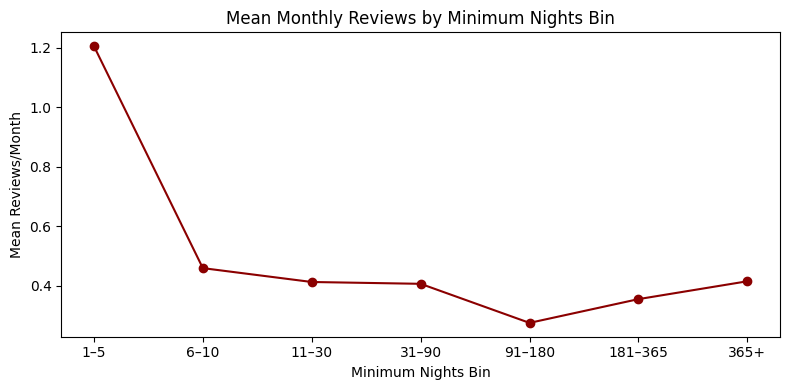

Guest preference analysis complete: features, amenities, and rating drivers visualized.


In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') 


try:
    df
except NameError:
    xls = pd.ExcelFile('Airbnb_Open_Data.xlsx') 
    df = pd.read_excel(xls, sheet_name=0)
    df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

for col in ['reviews_per_month', 'minimum_nights', 'review_rate_number']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


if 'room_type' in df.columns:
    rt = df.groupby('room_type')['reviews_per_month'].median().sort_values(ascending=False).reset_index()
    print(" Median Reviews/Month by Room Type:")
    print(rt.head())

    plt.figure(figsize=(7, 4))
    sns.barplot(data=rt, x='room_type', y='reviews_per_month', palette='Blues')
    plt.title('Median Reviews/Month by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Median Reviews/Month')
    plt.tight_layout()
    plt.show()


if 'neighbourhood_group' in df.columns:
    ng = df.groupby('neighbourhood_group')['reviews_per_month'].median().sort_values(ascending=False).reset_index()
    print(" Median Reviews/Month by Neighbourhood Group:")
    print(ng.head())

    plt.figure(figsize=(7, 4))
    sns.barplot(data=ng, x='neighbourhood_group', y='reviews_per_month', palette='Greens')
    plt.title('Median Reviews/Month by Neighbourhood Group')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Median Reviews/Month')
    plt.tight_layout()
    plt.show()


if 'instant_bookable' in df.columns:
    ib = df.groupby('instant_bookable')['reviews_per_month'].median().reset_index()
    print(" Median Reviews/Month by Instant Bookable:")
    print(ib.head())

    plt.figure(figsize=(6, 4))
    sns.barplot(data=ib, x='instant_bookable', y='reviews_per_month', palette='Oranges')
    plt.title('Median Reviews/Month by Instant Bookable')
    plt.xlabel('Instant Bookable')
    plt.ylabel('Median Reviews/Month')
    plt.tight_layout()
    plt.show()


if 'host_identity_verified' in df.columns:
    hv = df.groupby('host_identity_verified')['reviews_per_month'].median().reset_index()
    print("Median Reviews/Month by Host Identity Verified:")
    print(hv.head())

    plt.figure(figsize=(6, 4))
    sns.barplot(data=hv, x='host_identity_verified', y='reviews_per_month', palette='Purples')
    plt.title('Median Reviews/Month by Host Identity Verified')
    plt.xlabel('Host Identity Verified')
    plt.ylabel('Median Reviews/Month')
    plt.tight_layout()
    plt.show()


if 'minimum_nights' in df.columns:
    df['minimum_nights'] = df['minimum_nights'].fillna(0)
    df['min_n_bin'] = pd.cut(
        df['minimum_nights'],
        bins=[1, 5, 10, 30, 90, 180, 365, np.inf],
        labels=['1–5', '6–10', '11–30', '31–90', '91–180', '181–365', '365+']
    )
    mn = df.groupby('min_n_bin')['reviews_per_month'].mean().reset_index()
    mn['min_n_bin'] = mn['min_n_bin'].astype(str)

    print("Mean Reviews/Month by Minimum Nights Bin:")
    print(mn.head())

    plt.figure(figsize=(8, 4))
    plt.plot(mn['min_n_bin'], mn['reviews_per_month'], marker='o', color='darkred')
    plt.title('Mean Monthly Reviews by Minimum Nights Bin')
    plt.xlabel('Minimum Nights Bin')
    plt.ylabel('Mean Reviews/Month')
    plt.tight_layout()
    plt.show()


if 'amenities' in df.columns and 'review_rate_number' in df.columns:
    df['amenities_list'] = df['amenities'].astype(str).str.strip('{}').str.split(',')
    exploded = df[['review_rate_number', 'amenities_list']].explode('amenities_list')
    exploded['amenities_list'] = exploded['amenities_list'].str.strip().str.lower()

    amenity_rating = exploded.groupby('amenities_list')['review_rate_number'].mean().sort_values(ascending=False).reset_index()
    print("Top Amenities by Average Rating:")
    print(amenity_rating.head(10))

    plt.figure(figsize=(8, 4))
    sns.barplot(data=amenity_rating.head(10), x='review_rate_number', y='amenities_list', palette='coolwarm')
    plt.title('Top Amenities by Average Guest Rating')
    plt.xlabel('Average Rating')
    plt.ylabel('Amenity')
    plt.tight_layout()
    plt.show()

# %% [code]
print("Guest preference analysis complete: features, amenities, and rating drivers visualized.")


Host Performance Sample:
     host_id  host_name host_identity_verified  \
0  123600518      Meryl            unconfirmed   
1  124039648     Kierra            unconfirmed   
2  124472619       Erin               verified   
3  129756565       Rosa               verified   
4  130349612  Dimitrios            unconfirmed   

   calculated_host_listings_count  review_rate_number  reviews_per_month  \
0                             1.0                 3.0               1.80   
1                             1.0                 4.0               0.37   
2                             2.0                 2.0               0.16   
3                             2.0                 1.0               1.64   
4                             1.0                 4.0               0.17   

   is_top_quartile  
0            False  
1             True  
2            False  
3            False  
4             True  
Comparison of Host Practices:
   is_top_quartile  calculated_host_listings_count  reviews_p

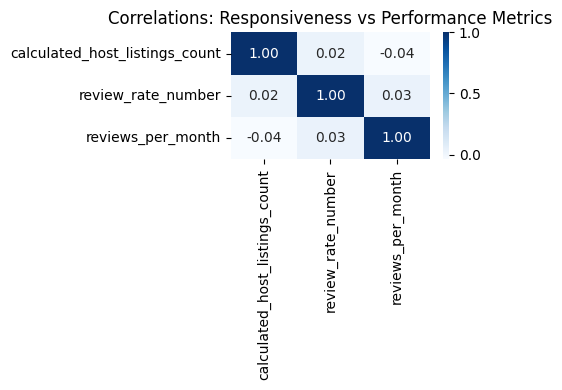

Common Complaint Signals:
       keyword  share_of_listings_flagged
0        kw_ac                   0.151277
1       kw_hot                   0.009636
2      kw_wifi                   0.003313
3      kw_dust                   0.001524
4  kw_internet                   0.000088


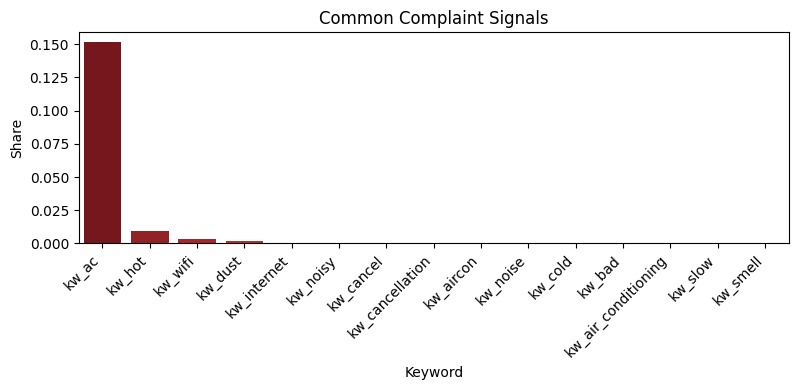

Host performance analysis complete: practices, responsiveness, and complaints visualized.


In [12]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


try:
    df
except NameError:
    df = pd.read_excel('Airbnb_Open_Data.xlsx')
    df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

num_cols = [
    'reviews_per_month', 'review_rate_number', 'review_scores_rating',
    'host_response_rate', 'host_acceptance_rate', 'calculated_host_listings_count'
]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

for c in ['host_response_rate', 'host_acceptance_rate']:
    if c in df.columns and df[c].dtype == object:
        df[c] = df[c].astype(str).str.replace('%', '', regex=False)
        df[c] = pd.to_numeric(df[c], errors='coerce')


perf_metric = None
if 'review_scores_rating' in df.columns:
    perf_metric = 'review_scores_rating'
elif 'review_rate_number' in df.columns:
    perf_metric = 'review_rate_number'
else:
    perf_metric = 'reviews_per_month'

host_group_cols = [
    'host_id', 'host_name', 'host_is_superhost', 'host_identity_verified',
    'host_response_rate', 'host_acceptance_rate', 'calculated_host_listings_count'
]
existing_cols = [c for c in host_group_cols if c in df.columns]
agg_map = {perf_metric: 'median'}
if 'reviews_per_month' in df.columns:
    agg_map['reviews_per_month'] = 'median'

host_perf = df.groupby(existing_cols, dropna=False).agg(agg_map).reset_index()

q75 = host_perf[perf_metric].quantile(0.75)
host_perf['is_top_quartile'] = host_perf[perf_metric] >= q75
print("Host Performance Sample:")
print(host_perf.head())


compare_cols = []
for c in ['host_is_superhost', 'host_identity_verified']:
    if c in host_perf.columns:
        compare_cols.append(c)
for c in ['host_response_rate', 'host_acceptance_rate', 'calculated_host_listings_count', 'reviews_per_month']:
    if c in host_perf.columns:
        compare_cols.append(c)

comp = host_perf.groupby('is_top_quartile')[compare_cols].median(numeric_only=True).reset_index()
print("Comparison of Host Practices:")
print(comp.head())


if 'host_response_rate' in host_perf.columns:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=host_perf, x='host_response_rate', hue='is_top_quartile', common_norm=False, fill=True, palette='Set2')
    plt.title('Host Response Rate Distribution by Performance Tier')
    plt.xlabel('Host Response Rate (%)')
    plt.tight_layout()
    plt.show()


corr_cols = [c for c in ['host_response_rate', 'host_acceptance_rate', 'calculated_host_listings_count', perf_metric, 'reviews_per_month'] if c in host_perf.columns]
corr_df = host_perf[corr_cols].corr(numeric_only=True)
print("Correlation Matrix:")
print(corr_df)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlations: Responsiveness vs Performance Metrics')
plt.tight_layout()
plt.show()


complaint_cols = [c for c in df.columns if 'review' in c and 'comments' in c]
neg_keywords = [
    'dirty', 'noisy', 'rude', 'slow', 'poor', 'bad', 'smell', 'smelly', 'bugs',
    'cockroach', 'bedbug', 'cold', 'hot', 'broken', 'cancel', 'canceled',
    'cancellation', 'unsafe', 'mold', 'dust', 'leak', 'leaking', 'wifi',
    'internet', 'thin walls', 'noise', 'heating', 'aircon', 'ac', 'air conditioning'
]

complaints = None
if len(complaint_cols) > 0:
    text_col = complaint_cols[0]
    sub = df[[text_col]].dropna().copy()
    sub['text_lower'] = sub[text_col].astype(str).str.lower()
    for kw in neg_keywords:
        sub['kw_' + kw.replace(' ', '_')] = sub['text_lower'].str.contains(kw, na=False)
    kw_cols = [c for c in sub.columns if c.startswith('kw_')]
    freq = sub[kw_cols].mean().sort_values(ascending=False).reset_index()
    freq.columns = ['keyword', 'share_of_reviews_flagged']
    complaints = freq.head(15)
else:
    text_candidates = [c for c in ['name', 'description', 'neighbourhood_overview'] if c in df.columns]
    if len(text_candidates) > 0:
        tc = text_candidates[0]
        sub = df[[tc]].dropna().copy()
        sub['text_lower'] = sub[tc].astype(str).str.lower()
        for kw in neg_keywords:
            sub['kw_' + kw.replace(' ', '_')] = sub['text_lower'].str.contains(kw, na=False)
        kw_cols = [c for c in sub.columns if c.startswith('kw_')]
        freq = sub[kw_cols].mean().sort_values(ascending=False).reset_index()
        freq.columns = ['keyword', 'share_of_listings_flagged']
        complaints = freq.head(15)


if complaints is not None:
    print("Common Complaint Signals:")
    print(complaints.head())

    plt.figure(figsize=(8, 4))
    sns.barplot(data=complaints, x=complaints.columns[0], y=complaints.columns[1], palette='Reds_r')
    plt.title('Common Complaint Signals')
    plt.xlabel('Keyword')
    plt.ylabel('Share')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# %% [code]
print("Host performance analysis complete: practices, responsiveness, and complaints visualized.")